# AirBnB Boston Area Data Analysis project

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Evaluation
5. Conclusion

# 1. Business Understanding.

This Notebook will analyze Airbnb listings data to compare the words used in the top-rated listings with ones used in worst-rated listings using publicly available Airbnb listing data for the Boston area. By answering the following three questions, we will develop insights into how the words used in the top-rated listings are different from those used in the low-rated listings.

* **What are the top 10 common terms used in Description in Boston AirBnB?**
* **What are the top 10 common terms used in the high rating listing?**
* **What are the top 10 common terms used in the low rating listing?**


In [106]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import nltk
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/jaesong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 2. Data Understanding.

We have the following three dataset from Kagggle (source: kaggle.com/airbnb/boston) 

- calendar.csv contains availablity and price informaiton for AirBnB listings.
- listings.csv contains title, description and various other information about for AirBnB listings.
- reviews.csv contains customer reivew information about the AirBnB listsings.

We will read the data set files into Panda's DataFrames, df_calenar, df_listing, df_reviews



In [107]:
#: get the three different data files
df_calendar = pd.read_csv('data/calendar.csv')
df_listing = pd.read_csv('data/listings.csv')
df_reviews = pd.read_csv('data/reviews.csv')

* The df_calendar has only 4 columsn as shown below. We don't need any information from this data set for this analysis. But it is good to know what data are available so the we can enhence/optimize our features. 

In [108]:
df_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


* df_listing is the main dataset we are going to use for this analysis. It has 95 columns including name (contains titles of listings), description (contains descriptions of listings).

* df_listing also contains review_scores_rating and number_of_reviews. These columns contain information about customer review scores for listings and number of reviews. We will use these columns later to filter out the top-rated listings and low-rated listings.

In [109]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [110]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

* df_reviews contains more detailed information about reviews. We are not going to use this DataFrame for this analysis.

In [111]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


# 3. Data Preparation

#### We use the name and description columns from df_listings to get words and run thru various preparation to featurize them.
- We drop listings with nan values in those two columns. These two are the main features, so we exclude any listings without proper words in the name and description columns
- We remove all the stop words: stop words that don't have much meaning.
- We use the Regular Expression library re to find matches with the stop words
- We use the NLTK library to tokenize words and eventually compute the frequencies of each tokenized words

#### We use the review_scores_rating and number_of_reviews columns from df_listings to define top-rated listings vs. low-rated listings. To have a balanced number of listings between the top-rated and low-rated listings, we use some arbitrary numbers to filter out the number_of_reviews column data.
- We define the top-rated listings as the listings with the review_scores_rating as 100 and the number_of_reviews greater than 8.
- We describe the low-rated listings as the listings with the review_scores_rating as less than 60 and the number_of_reviews greater than 1.

In [118]:
df_listing.name

0                          Sunny Bungalow in the City
1                   Charming room in pet friendly apt
2                    Mexican Folk Art Haven in Boston
3       Spacious Sunny Bedroom Suite in Historic Home
4                                 Come Home to Boston
                            ...                      
3580                             Big cozy room near T
3581              BU Apartment DexterPark Bright room
3582                         Gorgeous funky apartment
3583            Great Location; Train and Restaurants
3584               (K1) Private Room near Harvard/MIT
Name: name, Length: 3585, dtype: object

In [119]:
df_listing.description

0       Cozy, sunny, family home.  Master bedroom high...
1       Charming and quiet room in a second floor 1910...
2       Come stay with a friendly, middle-aged guy in ...
3       Come experience the comforts of home away from...
4       My comfy, clean and relaxing home is one block...
                              ...                        
3580    5 min walking to Orange Line subway with 2 sto...
3581    Most popular apartment in BU, best located in ...
3582    Funky little apartment close to public transpo...
3583    My place is close to Taco Loco Mexican Grill, ...
3584    My place is close to My home is a warm and fri...
Name: description, Length: 3585, dtype: object

### Remove Stop words

In [120]:
# Combining all  
preprocessed_description = []
preprocessed_name = []

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

#: remove nan first
ser_description = df_listing['description'].dropna()
ser_name = df_listing['name'].dropna()

#: remove stop words in titles
for sentance in tqdm(ser_name.values):
    str = "123456790abcdefABCDEF!@#$%^&*()_+<>?,./"
    sentance = re.sub(r'[^a-zA-Z]', " ", sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_name.append(sentance.strip())    

#: remove stop words in descriptions
for sentance in tqdm(ser_description.values):
    str = "123456790abcdefABCDEF!@#$%^&*()_+<>?,./"
    sentance = re.sub(r'[^a-zA-Z]', " ", sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_description.append(sentance.strip())
    


100%|██████████| 3585/3585 [00:00<00:00, 9087.62it/s]


In [121]:
allDescriptionText = ' '.join(preprocessed_description)
allNameText = ' '.join(preprocessed_name)

### Tokenize words using the NLTK library

In [122]:
#: most frequent words in titles
allWords = nltk.tokenize.word_tokenize(allNameText)
allWordDist4Name = nltk.FreqDist(w for w in allWords)
allWordDist4Name

FreqDist({'boston': 715, 'room': 629, 'bedroom': 362, 'private': 354, 'end': 354, 'apt': 329, 'apartment': 310, 'near': 270, 'cozy': 261, 'studio': 248, ...})

In [123]:
#: most frequent words in descriptions
allWords = nltk.tokenize.word_tokenize(allDescriptionText)
allWordDist = nltk.FreqDist(w for w in allWords)
allWordDist

FreqDist({'boston': 5323, 'room': 3670, 'apartment': 3282, 'kitchen': 2768, 'walk': 2667, 'bedroom': 2481, 'bed': 2196, 'living': 1957, 'located': 1825, 'street': 1791, ...})

## Get the top-rated listings

- We define the top-rated listings as thos listings with 
The topreview_scores_rating == 100

In [124]:
df_listing['review_scores_rating'].value_counts().head()

100.0    628
93.0     205
96.0     197
95.0     171
97.0     168
Name: review_scores_rating, dtype: int64

In [125]:
#: number of reviews for listings with top rating
df_listing[df_listing['review_scores_rating']==100]['number_of_reviews'].value_counts().head()

1    231
2    124
3     60
4     49
5     29
Name: number_of_reviews, dtype: int64

In [126]:
#: Desccription of top-rate listins
ser_description_top = df_listing[(df_listing['review_scores_rating']==100) & (df_listing['number_of_reviews']>8) ]['description'].dropna()
ser_description_top



104     Jamaica Plain, or JP, is a great landing spot ...
114     My Place is less than a 7 minute walk to the G...
123     Our place is a clean, comfortable, and beautif...
151     Enjoy our renovated apartment in Jamaica Plain...
211     Centrally located in the hip neighborhood of J...
                              ...                        
3279    Renovated - entire 3 bedroom (8 total beds), 1...
3283    Renovated - entire 3 bedroom (8 total beds), 1...
3293                                 This is a good room!
3301                     This is the best room in Boston!
3516    We are delighted to sublet one bedroom in our ...
Name: description, Length: 73, dtype: object

In [127]:
#: name of the top -rated listins
ser_name_top = df_listing[(df_listing['review_scores_rating']==100) & (df_listing['number_of_reviews']>8) ]['name'].dropna()
ser_name_top


104       Stay in Boston's best neighborhood!
114                     Tranquil Treetop Loft
123       Sunny, Cozy and Convenient JP Home!
151       Quiet, Spacious 2BD in Boston's JP!
211       Cozy, bohemian Jamaica Plain studio
                        ...                  
3279    3 bed 1 bath near Downtown & Ocean #3
3283      3 bed 1 bath near Downtown/Ocean #2
3293                      l GREAT ROOM BOSOTN
3301                       k Best Room Boston
3516       1 Bedroom in Furnished Harvard Apt
Name: name, Length: 73, dtype: object

In [128]:
preprocessed_description4top = []
preprocessed_name4top = []

for sentance in tqdm(ser_description_top.values):
    str = "123456790abcdefABCDEF!@#$%^&*()_+<>?,./"
    sentance = re.sub(r'[^a-zA-Z]', " ", sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_description4top.append(sentance.strip())
    
for sentance in tqdm(ser_name_top.values):
    str = "123456790abcdefABCDEF!@#$%^&*()_+<>?,./"
    sentance = re.sub(r'[^a-zA-Z]', " ", sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_name4top.append(sentance.strip())
    

100%|██████████| 73/73 [00:00<00:00, 21966.01it/s]


In [129]:
topDescriptionText = ' '.join(preprocessed_description4top)
topNameText = ' '.join(preprocessed_name4top)

In [130]:
#: most frequent words using FreqDist function in nltk
allWordsTop = nltk.tokenize.word_tokenize(topDescriptionText)
allWordDistTop = nltk.FreqDist(w for w in allWordsTop)
allWordDistTop

FreqDist({'boston': 124, 'room': 97, 'bedroom': 81, 'apartment': 73, 'kitchen': 68, 'private': 62, 'bed': 59, 'living': 56, 'walk': 54, 'home': 51, ...})

In [131]:
#: most frequent words using FreqDist function in nltk
allWordsTop4Name = nltk.tokenize.word_tokenize(topNameText)
allWordDistTop4Name = nltk.FreqDist(w for w in allWordsTop4Name)
allWordDistTop4Name

FreqDist({'boston': 15, 'room': 10, 'end': 10, 'south': 9, 'private': 7, 'near': 7, 'sunny': 6, 'cozy': 6, 'location': 6, 'w': 6, ...})

## Get the low-rated listings

- We define the low-rated listings as those listings with review_scores_rating < 60


In [134]:
#: Titles for low-rated listings with review_scores_rating < 60 and number_of_reviews > 1

ser_name_bot = df_listing[(df_listing['review_scores_rating']<60) & (df_listing['number_of_reviews']>1) ]['name'].dropna()
ser_name_bot

514     Boston beautiful new Apartment #43end day12/31/16
820                    Local BedNBreakfast Mins 2 Dwntown
1615                            Eagle Hill Cozy Apartment
1681                  Harbor Side 1BR Nr. Airport & Train
2565                       Single Private Room in a House
2638                  Best value-Cozy, quiet private room
2846                      Umass,MGH,City,BCEC,Longwood 2A
2881                  Umass,city, longwood, MGH, BCEC 16B
2943                    Umass,MGH,Harvard,MIT,Longwood A3
2982                  Umass, City, MGH, BCEC, Longwood 2E
3376                             Clean bedroom in Allston
3437                              Cosy Bedroom by Harvard
3484                    Whole Apt.2 beds,wifi,close train
Name: name, dtype: object

In [135]:
#: Descriptions for low-rated listings with review_scores_rating < 60 and number_of_reviews > 1
ser_description_bot = df_listing[(df_listing['review_scores_rating']<60) & (df_listing['number_of_reviews']>1) ]['description'].dropna()
ser_description_bot


514     2 bedrooms, 1 full baths, kitchen. Close to bi...
820     Great local BednBreakfast minutes from Dwntown...
1615    The apartment is close to Rino's Place restaur...
1681    Very cool one bedroom unit close to the train ...
2565    1 Single Private Room in a 3 stories house Sha...
2638    If you are looking for a place to stay during ...
2846    Come live in our international home with schol...
2881    Affordable Comfortable private room share with...
2943    Come live with other international students/do...
2982    Private room shared kitchen and bath. 2 mins t...
3376    Convenient transportation: 5 minutes walk to t...
3437    We are next to Harvard. Safe and quiet. Our lo...
3484    My place is good for couples, solo adventurers...
Name: description, dtype: object

In [136]:
preprocessed_description4bot = []
preprocessed_name4bot = []


In [137]:
for sentance in tqdm(ser_description_bot.values):
    str = "123456790abcdefABCDEF!@#$%^&*()_+<>?,./"
    sentance = re.sub(r'[^a-zA-Z]', " ", sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_description4bot.append(sentance.strip())
    
for sentance in tqdm(ser_name_bot.values):
    str = "123456790abcdefABCDEF!@#$%^&*()_+<>?,./"
    sentance = re.sub(r'[^a-zA-Z]', " ", sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_name4bot.append(sentance.strip())
    


100%|██████████| 13/13 [00:00<00:00, 12923.90it/s]


In [138]:
botDescriptionText = ' '.join(preprocessed_description4bot)
botNameText = ' '.join(preprocessed_name4bot)



In [139]:
#: most frequent words in Titles
allWordsBot4Name = nltk.tokenize.word_tokenize(botNameText)
allWordDistBot4Name = nltk.FreqDist(w for w in allWordsBot4Name)
allWordDistBot4Name

FreqDist({'umass': 4, 'mgh': 4, 'longwood': 4, 'city': 3, 'bcec': 3, 'apartment': 2, 'cozy': 2, 'train': 2, 'private': 2, 'room': 2, ...})

In [140]:
#: most frequent words in Descriptions
allWordsBot = nltk.tokenize.word_tokenize(botDescriptionText)
allWordDistBot = nltk.FreqDist(w for w in allWordsBot)
allWordDistBot

FreqDist({'mins': 19, 'room': 12, 'train': 11, 'station': 11, 'apartment': 10, 'kitchen': 8, 'boston': 8, 'minutes': 7, 'free': 7, 'access': 6, ...})

# 4. Evaluation

- We answer those three questions above
- We plot histograms to display those frequent words

## List the top 10 most frequently used words in all listings

In [142]:
#: Titles
sortedWord4Name = sorted(allWordDist4Name.items(), key=lambda x: x[1], reverse=True)
sortedWord4Name[:10]


[('boston', 715),
 ('room', 629),
 ('bedroom', 362),
 ('private', 354),
 ('end', 354),
 ('apt', 329),
 ('apartment', 310),
 ('near', 270),
 ('cozy', 261),
 ('studio', 248)]

In [143]:
#: Descriptions
sortedWord = sorted(allWordDist.items(), key=lambda x: x[1], reverse=True)
sortedWord[:10]


[('boston', 5323),
 ('room', 3670),
 ('apartment', 3282),
 ('kitchen', 2768),
 ('walk', 2667),
 ('bedroom', 2481),
 ('bed', 2196),
 ('living', 1957),
 ('located', 1825),
 ('street', 1791)]

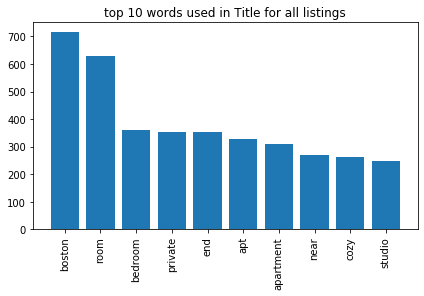

In [144]:
word = []
frequency = []
for i in range(len(sortedWord4Name[:10])):
    word.append(sortedWord4Name[i][0])
    frequency.append(sortedWord4Name[i][1])
    
indices = np.arange(len(sortedWord4Name[:10]))
plt.bar(indices, frequency)
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.title('top 10 words used in Title for all listings')

plt.show()

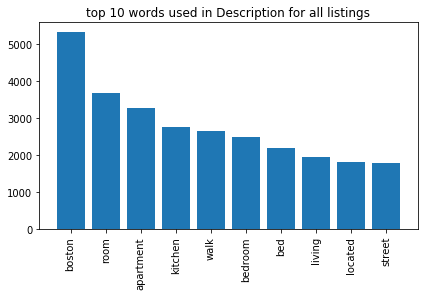

In [145]:
word = []
frequency = []
for i in range(len(sortedWord[:10])):
    word.append(sortedWord[i][0])
    frequency.append(sortedWord[i][1])
    
indices = np.arange(len(sortedWord[:10]))
plt.bar(indices, frequency)
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.title('top 10 words used in Description for all listings')
plt.show()

## List the top 10 most frequently used words in the top-rated listings

In [155]:
#: Titles of top-rated listings
topSortedWord4Name = sorted(allWordDistTop4Name.items(), key=lambda x: x[1], reverse=True)
topSortedWord4Name[:10]


[('boston', 15),
 ('room', 10),
 ('end', 10),
 ('south', 9),
 ('private', 7),
 ('near', 7),
 ('sunny', 6),
 ('cozy', 6),
 ('location', 6),
 ('w', 6)]

In [147]:
#: Descriptions of top-rated listings

topSortedWord = sorted(allWordDistTop.items(), key=lambda x: x[1], reverse=True)
topSortedWord[:10]


[('boston', 124),
 ('room', 97),
 ('bedroom', 81),
 ('apartment', 73),
 ('kitchen', 68),
 ('private', 62),
 ('bed', 59),
 ('living', 56),
 ('walk', 54),
 ('home', 51)]

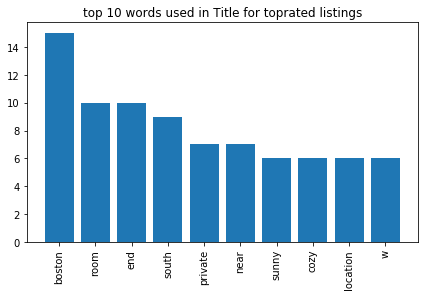

In [149]:
word = []
frequency = []
for i in range(len(topSortedWord4Name[:10])):
    word.append(topSortedWord4Name[i][0])
    frequency.append(topSortedWord4Name[i][1])
    
indices = np.arange(len(topSortedWord4Name[:10]))
plt.bar(indices, frequency)
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.title('top 10 words used in Title for toprated listings')

plt.show()

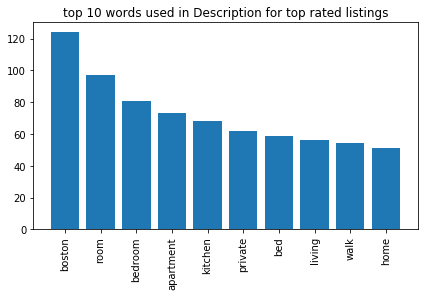

In [150]:
word = []
frequency = []
for i in range(len(topSortedWord[:10])):
    word.append(topSortedWord[i][0])
    frequency.append(topSortedWord[i][1])
    
indices = np.arange(len(topSortedWord[:10]))
plt.bar(indices, frequency)
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.title('top 10 words used in Description for top rated listings')

plt.show()

## List the top 10 most frequently used words in the low-rated listings


In [151]:
#: Titles of low-rated listings
botSortedWord4Name = sorted(allWordDistBot4Name.items(), key=lambda x: x[1], reverse=True)
botSortedWord4Name[:10]


[('umass', 4),
 ('mgh', 4),
 ('longwood', 4),
 ('city', 3),
 ('bcec', 3),
 ('apartment', 2),
 ('cozy', 2),
 ('train', 2),
 ('private', 2),
 ('room', 2)]

In [152]:
#: Descriptions of low-rated listings
botSortedWord = sorted(allWordDistBot.items(), key=lambda x: x[1], reverse=True)
botSortedWord[:10]


[('mins', 19),
 ('room', 12),
 ('train', 11),
 ('station', 11),
 ('apartment', 10),
 ('kitchen', 8),
 ('boston', 8),
 ('minutes', 7),
 ('free', 7),
 ('access', 6)]

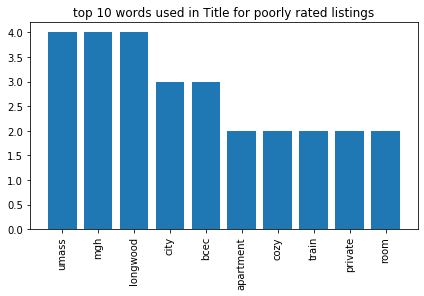

In [153]:
word = []
frequency = []
for i in range(len(botSortedWord4Name[:10])):
    word.append(botSortedWord4Name[i][0])
    frequency.append(botSortedWord4Name[i][1])
    
indices = np.arange(len(botSortedWord4Name[:10]))
plt.bar(indices, frequency)
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.title('top 10 words used in Title for poorly rated listings')

plt.show()

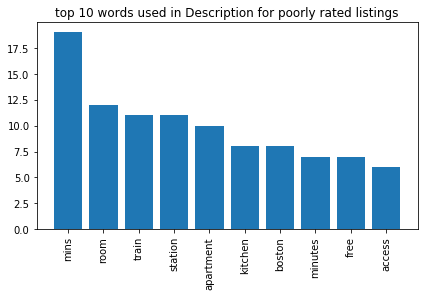

In [154]:
word = []
frequency = []
for i in range(len(botSortedWord[:10])):
    word.append(botSortedWord[i][0])
    frequency.append(botSortedWord[i][1])
    
indices = np.arange(len(botSortedWord[:10]))
plt.bar(indices, frequency)
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.title('top 10 words used in Description for poorly rated listings')

plt.show()

# 5. Conclusion

After examing those ten most frequent words used in the title and description of all listings, the top-rated listings, and the poorly rated listings, I made the following observations
* Six out of ten overlapping words are in the titles of all listings and the top-rated listings.
* Seven out of ten overlapping words are in the descriptions of all listings and the top-rated listings.
* Four out of ten overlapping words are in the titles of all listings and the poorly rated listings
* Four out of ten overlapping words are in the descriptions of all listings and the poorly rated listings

In general, I can see more specific/unique words used in the poorly rated listings. For example, words indicating particular parts of the city, such as MGH, Longwood, and terms that specify a time, such as mins, are used.